In [1]:
import numpy as np
import pandas as pd

from models import LogisticRegression
from ml_utils import optim_data, test_plots, optim_bench

# Apple quality dataset

In [2]:
# load with constant column
X_train_apple = pd.read_csv("datasets/apple_quality/apple_X_train.csv").values
y_train_apple = pd.read_csv("datasets/apple_quality/apple_y_train.csv").values.reshape(-1)
X_test_apple = pd.read_csv("datasets/apple_quality/apple_X_test.csv").values
y_test_apple = pd.read_csv("datasets/apple_quality/apple_y_test.csv").values.reshape(-1)

In [3]:
print(f"""
Apple quality dataset
X_train = {X_train_apple.shape}, y_train = {y_train_apple.shape}
X_test = {X_test_apple.shape}, y_test = {y_test_apple.shape}""")


Apple quality dataset
X_train = (3200, 8), y_train = (3200,)
X_test = (800, 8), y_test = (800,)


In [4]:
w0Apple = (2 + 2) * np.random.default_rng(42).random(8) - 2

In [38]:
benchmarkApple = LogisticRegression(C=1/X_train_apple.shape[0]).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple)

## SGD

### SGD-Fixed/Decreasing

In [43]:
sgdApple_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1/X_train_apple.shape[0], minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1)
sgdApple_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1)
sgdApple_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.01)

In [17]:
sgdApple_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1)
sgdApple_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1)
sgdApple_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.01)

In [47]:
modelsApple_data1 = optim_data([sgdApple_fixed1, sgdApple_fixed2, sgdApple_fixed3, sgdApple_decre1, sgdApple_decre2, sgdApple_decre3])

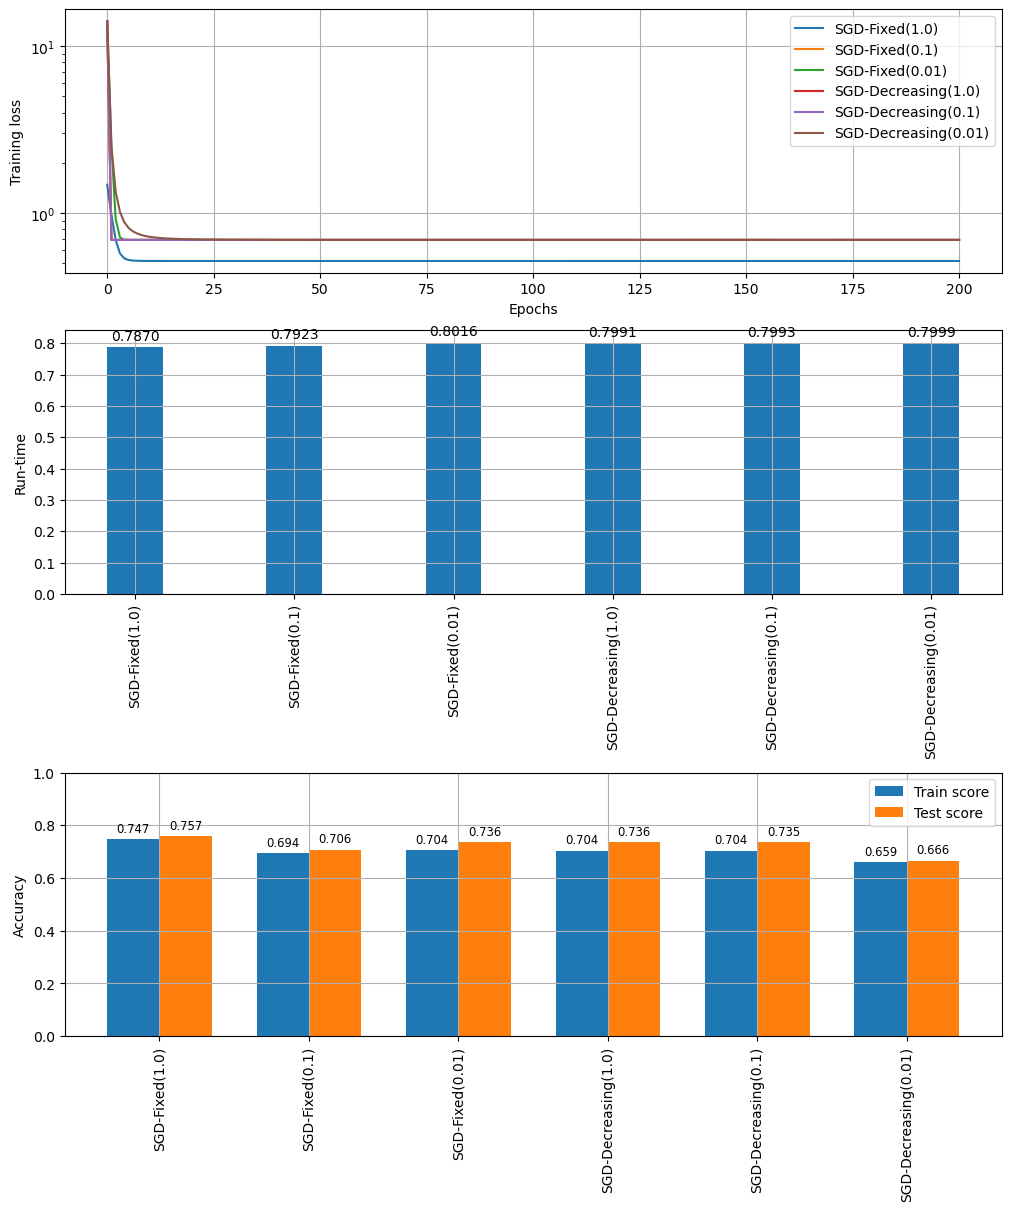

In [48]:
test_plots(modelsApple_data1)

### SGD-Armijo

In [20]:
sgdApple_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1)
sgdApple_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1)
sgdApple_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.01)

In [21]:
modelsApple_data2 = optim_data([sgdApple_armijo1, sgdApple_armijo2, sgdApple_armijo3])

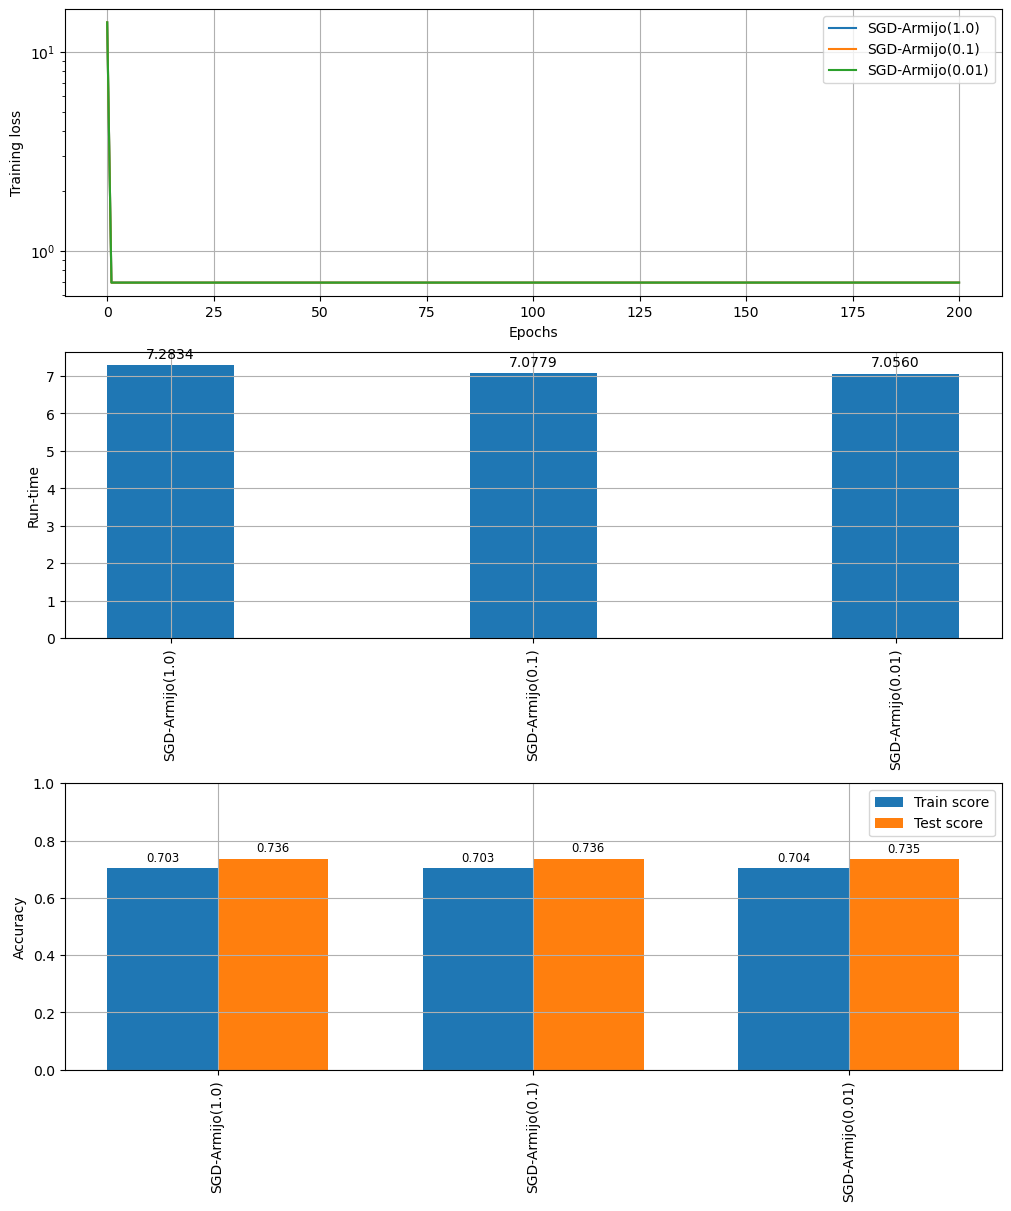

In [22]:
test_plots(modelsApple_data2)

## SGDM

In [23]:
sgdmApple_1 = LogisticRegression(solver="SGDM", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1, momentum=0.9)
sgdmApple_2 = LogisticRegression(solver="SGDM", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1, momentum=0.9)
sgdmApple_3 = LogisticRegression(solver="SGDM", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.01, momentum=0.9)

In [24]:
modelsApple_data3 = optim_data([sgdmApple_1, sgdmApple_2, sgdmApple_3])

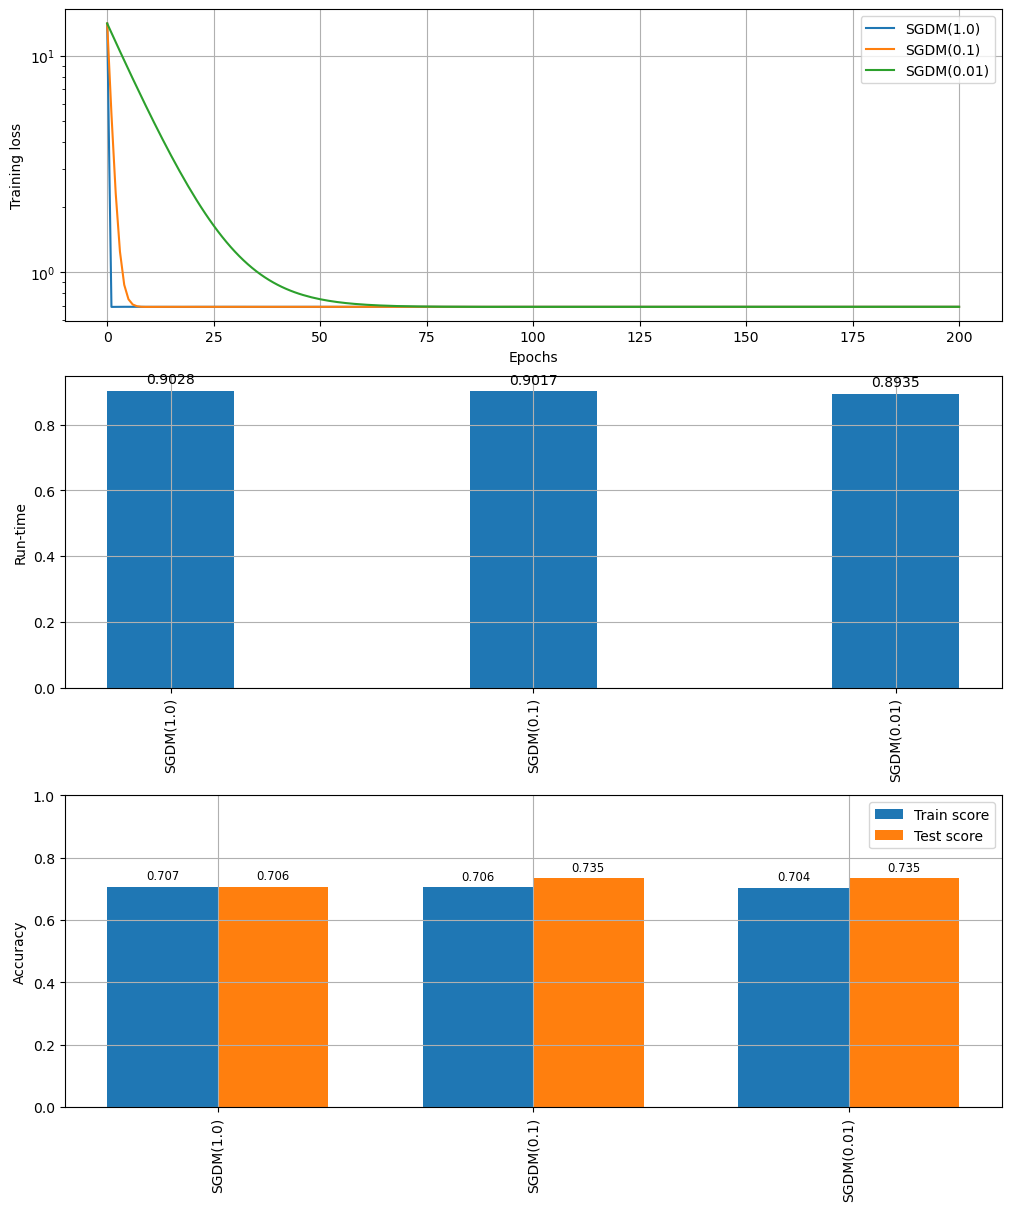

In [25]:
test_plots(modelsApple_data3)

### MSL-SGDM-C/R

In [26]:
mslcApple_1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1, momentum=0.9)
mslcApple_2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1, momentum=0.9)
mslcApple_3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.01, momentum=0.9)

In [27]:
mslrApple_1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1, momentum=0.9)
mslrApple_2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1, momentum=0.9)
mslrApple_3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.01, momentum=0.9)

In [28]:
modelsApple_data4 = optim_data([mslcApple_1, mslcApple_2, mslcApple_3, mslrApple_1, mslrApple_2, mslrApple_3])

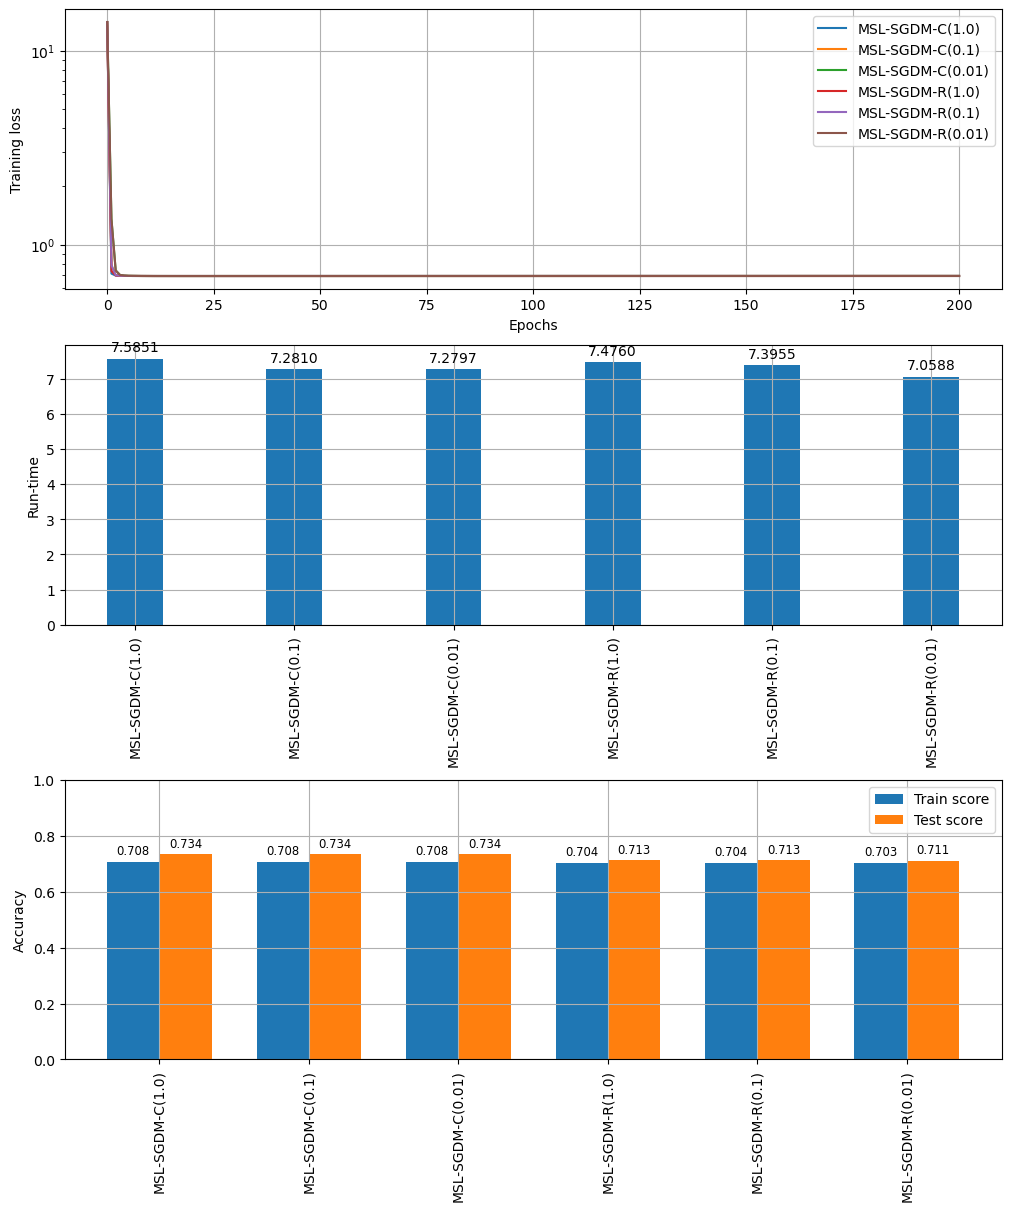

In [29]:
test_plots(modelsApple_data4)

## Summary

In [49]:
pd.concat([optim_bench(benchmarkApple).drop(columns={"Solution", "Loss/Epochs"}),
          pd.concat([modelsApple_data1, modelsApple_data2, modelsApple_data3, modelsApple_data4]).drop(columns={"Solution", "Loss/Epochs", "labels"})])

,Solver,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy
0,L-BFGS,NaN,NaN,NaN,0.513905,0.000223,NaN,8,0.745313,0.75375
0,SGD-Fixed,32.0,1.00,0.0,0.517095,0.016754,0.787035,200,0.747188,0.75750
1,SGD-Fixed,32.0,0.10,0.0,0.691374,0.241510,0.792315,200,0.694375,0.70625
2,SGD-Fixed,32.0,0.01,0.0,0.691278,0.240979,0.801604,200,0.704375,0.73625
3,SGD-Decreasing,32.0,1.00,0.0,0.691269,0.240927,0.799107,200,0.704063,0.73625
4,SGD-Decreasing,32.0,0.10,0.0,0.691267,0.240917,0.799333,200,0.704063,0.73500
5,SGD-Decreasing,32.0,0.01,0.0,0.690924,0.238683,0.799936,200,0.658750,0.66625
0,SGD-Armijo,32.0,1.00,0.0,0.691256,0.240859,7.283361,200,0.703125,0.73625
1,SGD-Armijo,32.0,0.10,0.0,0.691253,0.240841,7.077915,200,0.703438,0.73625
2,SGD-Armijo,32.0,0.01,0.0,0.691254,0.240847,7.055952,200,0.704063,0.73500


# Cars purchaising dataset

In [2]:
# load with constant column
X_train_car = pd.read_csv("datasets/cars/car_X_train.csv").values
y_train_car = pd.read_csv("datasets/cars/car_y_train.csv").values.reshape(-1)
X_test_car = pd.read_csv("datasets/cars/car_X_test.csv").values
y_test_car = pd.read_csv("datasets/cars/car_y_test.csv").values.reshape(-1)

In [3]:
print(f"""
Car purchaising dataset
X_train = {X_train_car.shape}, y_train = {y_train_car.shape}
X_test = {X_test_car.shape}, y_test = {y_test_car.shape}""")


Car purchaising dataset
X_train = (754, 4), y_train = (754,)
X_test = (189, 4), y_test = (189,)


In [4]:
X_train_car[:10,:]

array([[ 1.        , -1.0433804 , -1.10618747, -0.42470235],
       [ 1.        , -1.0433804 ,  0.17628534,  0.40586215],
       [ 1.        , -1.0433804 ,  0.54270614, -0.43902243],
       [ 1.        ,  0.95842322,  1.91678415, -0.76838422],
       [ 1.        , -1.0433804 , -0.46495106,  0.13378067],
       [ 1.        ,  0.95842322, -1.28939787, -1.69918926],
       [ 1.        , -1.0433804 ,  0.81752174, -0.0094201 ],
       [ 1.        ,  0.95842322,  0.90912694,  0.39154207],
       [ 1.        ,  0.95842322, -0.19013546, -0.31014173],
       [ 1.        , -1.0433804 , -0.28174066,  0.74954401]])

In [5]:
w0Car = (2 + 2) * np.random.default_rng(42).random(4) - 2

In [6]:
benchmarkCar = LogisticRegression().fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car)

## SGD

### SGD-Fixed/Decreasing

In [7]:
sgdCar_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1)
sgdCar_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1)
sgdCar_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.05)

In [8]:
sgdCar_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1)
sgdCar_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1)
sgdCar_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01)

In [9]:
modelsCar_data1 = optim_data([sgdCar_fixed1, sgdCar_fixed2, sgdCar_fixed3, sgdCar_decre1, sgdCar_decre2, sgdCar_decre3])

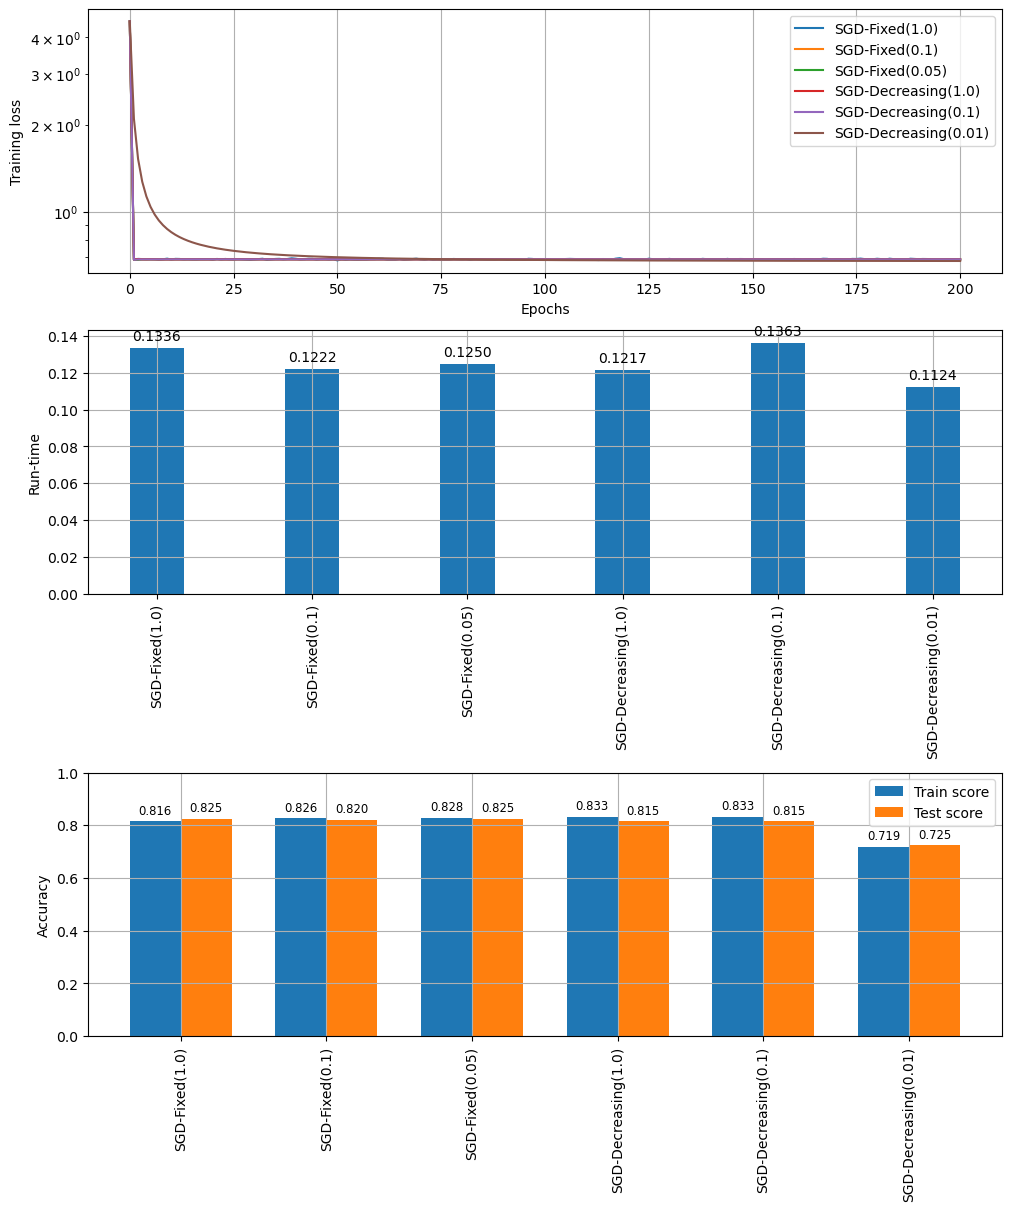

In [10]:
test_plots(modelsCar_data1)

### SGD-Armijo

In [11]:
sgdCar_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1)
sgdCar_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1)
sgdCar_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01)

In [12]:
modelsCar_data2 = optim_data([sgdCar_armijo1, sgdCar_armijo2, sgdCar_armijo3])

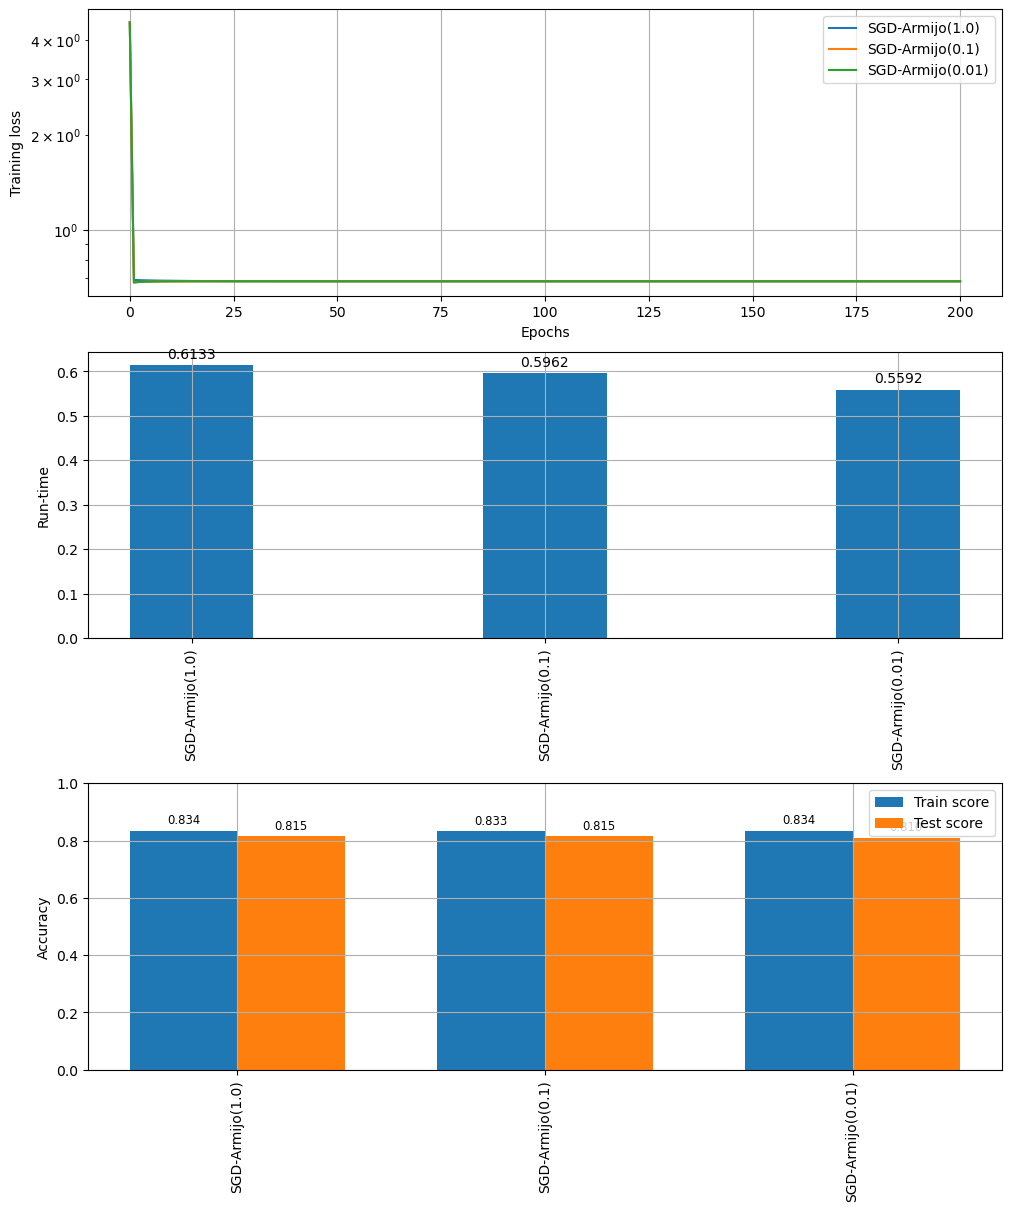

In [13]:
test_plots(modelsCar_data2)

## SGDM

In [14]:
sgdmCar_1 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1, momentum=0.9)
sgdmCar_2 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1, momentum=0.9)
sgdmCar_3 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01, momentum=0.9)

In [15]:
modelsCar_data3 = optim_data([sgdmCar_1, sgdmCar_2, sgdmCar_3])

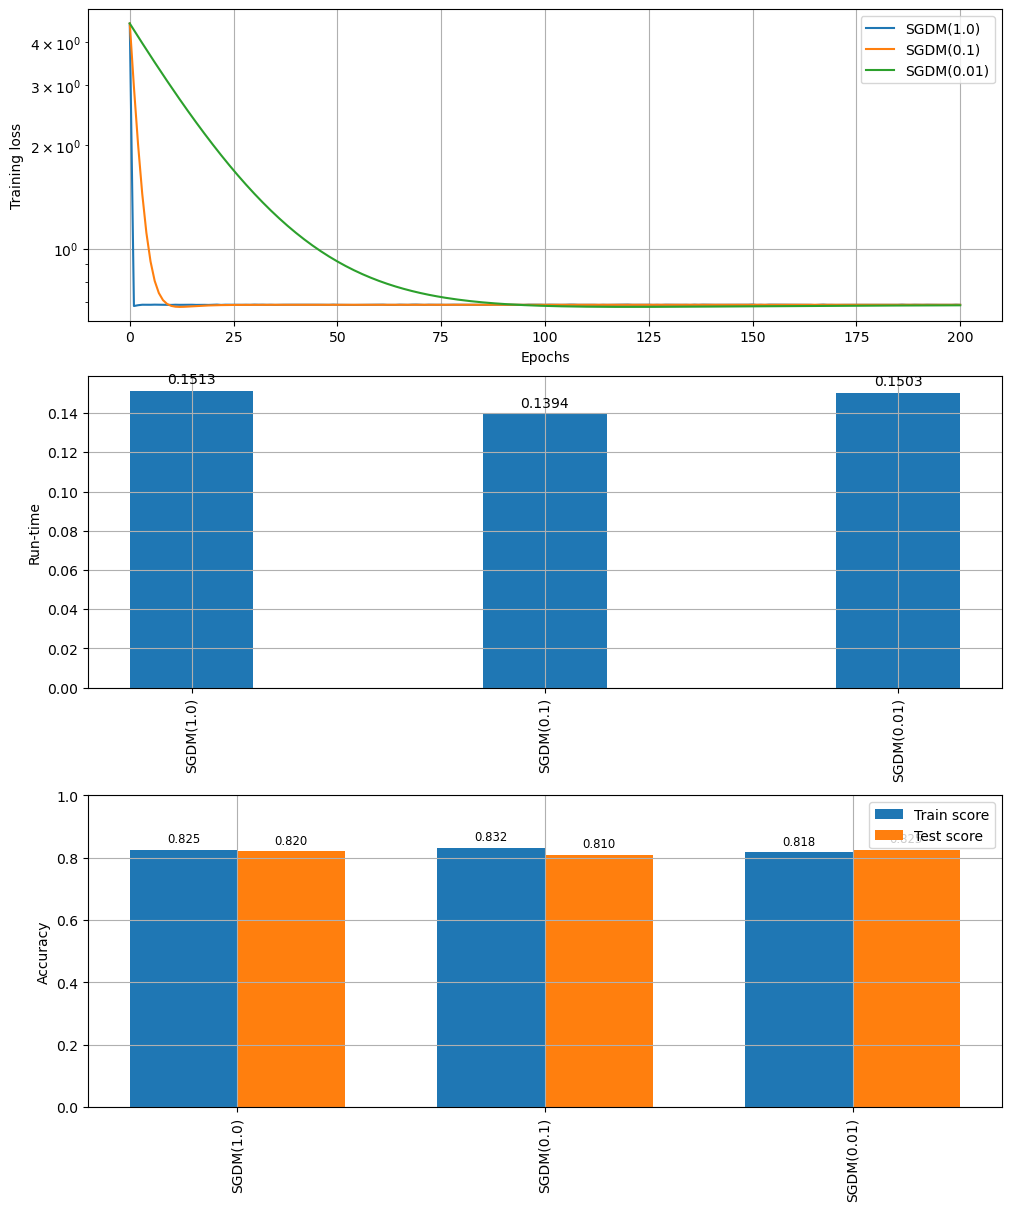

In [16]:
test_plots(modelsCar_data3)

### MSL-SGDM-C/R

In [17]:
mslcCar_1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1, momentum=0.9)
mslcCar_2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1, momentum=0.9)
mslcCar_3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01, momentum=0.9)

In [18]:
mslrCar_1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1, momentum=0.9)
mslrCar_2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1, momentum=0.9)
mslrCar_3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01, momentum=0.9)

modelsCar_data4 = optim_data([mslcCar_1, mslcCar_2, mslcCar_3, mslrCar_1, mslrCar_2, mslrCar_3])

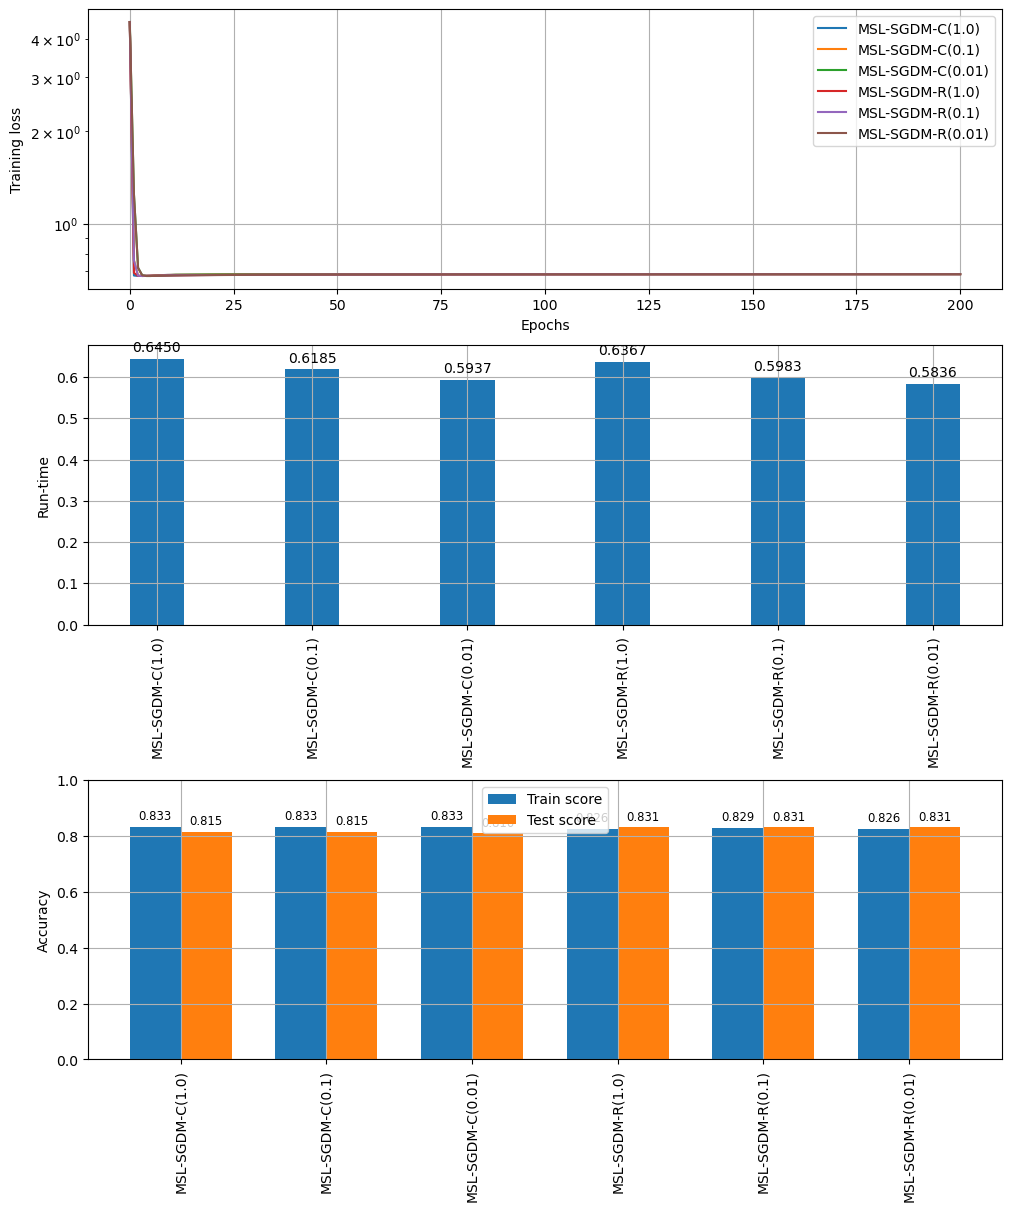

In [19]:
test_plots(modelsCar_data4)

## Summary

In [20]:
pd.concat([optim_bench(benchmarkCar).drop(columns={"Solution", "Loss/Epochs"}),
          pd.concat([modelsCar_data1, modelsCar_data2, modelsCar_data3, modelsCar_data4]).drop(columns={"Solution", "Loss/Epochs", "labels"})])

,Solver,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy
0,L-BFGS,NaN,NaN,NaN,0.640961,0.000014,NaN,4,0.828912,0.814815
0,SGD-Fixed,16.0,1.00,0.0,0.684454,0.332329,0.133562,200,0.815650,0.825397
1,SGD-Fixed,16.0,0.10,0.0,0.685167,0.335471,0.122183,200,0.826260,0.820106
2,SGD-Fixed,16.0,0.05,0.0,0.685427,0.336527,0.124985,200,0.827586,0.825397
3,SGD-Decreasing,16.0,1.00,0.0,0.685528,0.336914,0.121712,200,0.832891,0.814815
4,SGD-Decreasing,16.0,0.10,0.0,0.685529,0.336917,0.136333,200,0.832891,0.814815
5,SGD-Decreasing,16.0,0.01,0.0,0.676647,0.259984,0.112417,200,0.718833,0.724868
0,SGD-Armijo,16.0,1.00,0.0,0.685475,0.336694,0.613347,200,0.834218,0.814815
1,SGD-Armijo,16.0,0.10,0.0,0.685471,0.336681,0.596223,200,0.832891,0.814815
2,SGD-Armijo,16.0,0.01,0.0,0.685461,0.336642,0.559171,200,0.834218,0.809524


# Loan eligibility dataset

In [2]:
# load with constant column
X_train_loan = pd.read_csv("datasets/loan_data/loan_X_train.csv").values
y_train_loan = pd.read_csv("datasets/loan_data/loan_y_train.csv").values.reshape(-1)
X_test_loan = pd.read_csv("datasets/loan_data/loan_X_test.csv").values
y_test_loan = pd.read_csv("datasets/loan_data/loan_y_test.csv").values.reshape(-1)

In [4]:
print(f"""
Loan eligibility dataset
X_train = {X_train_loan.shape}, y_train = {y_train_loan.shape}
X_test = {X_test_loan.shape}, y_test = {y_test_loan.shape}""")


Loan eligibility dataset
X_train = (384, 12), y_train = (384,)
X_test = (96, 12), y_test = (96,)


In [3]:
w0Loan = (1.5 + 1.5) * np.random.default_rng(42).random(12) - 1.5

## SGD

### SGD-Fixed

In [4]:
sgdLoan_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1)
sgdLoan_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1)
sgdLoan_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.05)

sgdLoan_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1)
sgdLoan_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1)
sgdLoan_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.05)

modelsLoan_data1 = optim_data([sgdLoan_fixed1, sgdLoan_fixed2, sgdLoan_fixed3, sgdLoan_decre1, sgdLoan_decre2, sgdLoan_decre3])

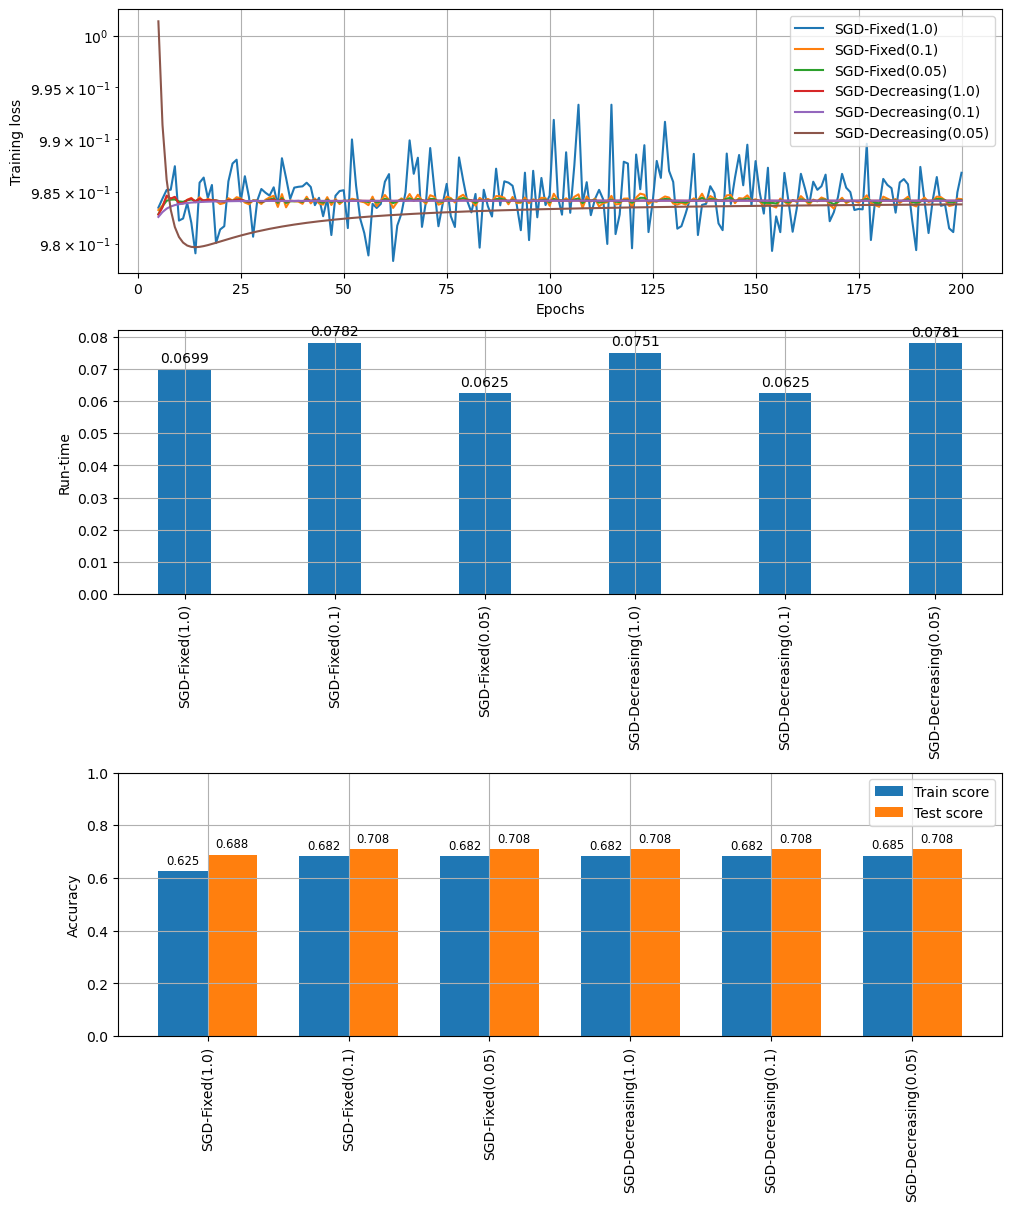

In [5]:
test_plots(modelsLoan_data1)

### SGD-Armijo

In [19]:
sgdLoan_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1)
sgdLoan_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1)
sgdLoan_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.01)

modelsLoan_data2 = optim_data([sgdLoan_armijo1, sgdLoan_armijo2, sgdLoan_armijo3])

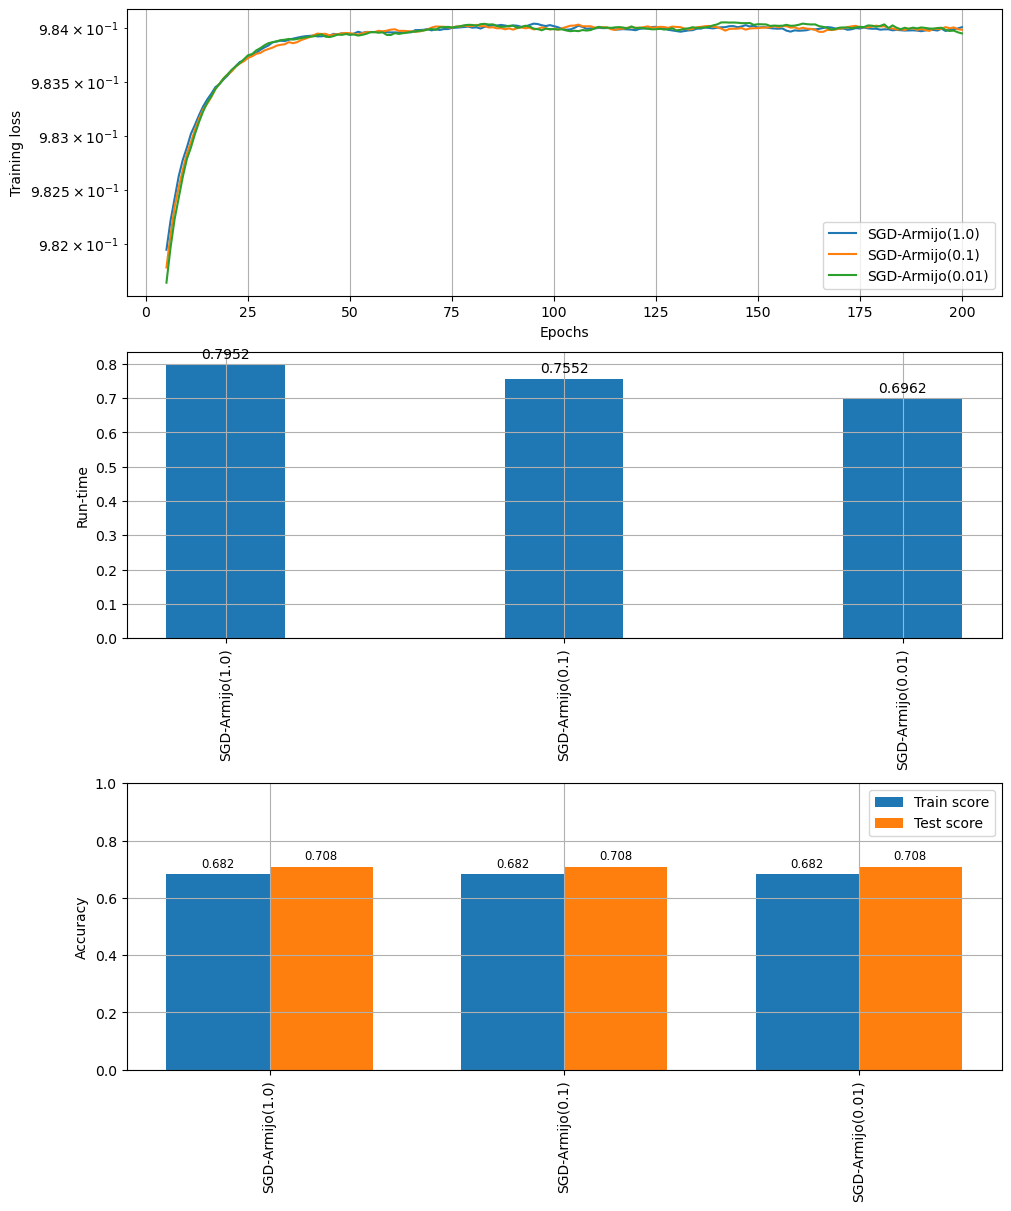

In [22]:
test_plots(modelsLoan_data2)

## SGDM

In [23]:
sgdmLoan_1 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1, momentum=0.9)
sgdmLoan_2 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1, momentum=0.9)
sgdmLoan_3 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.05, momentum=0.9)

modelsLoan_data3 = optim_data([sgdmLoan_1, sgdmLoan_2, sgdmLoan_3])

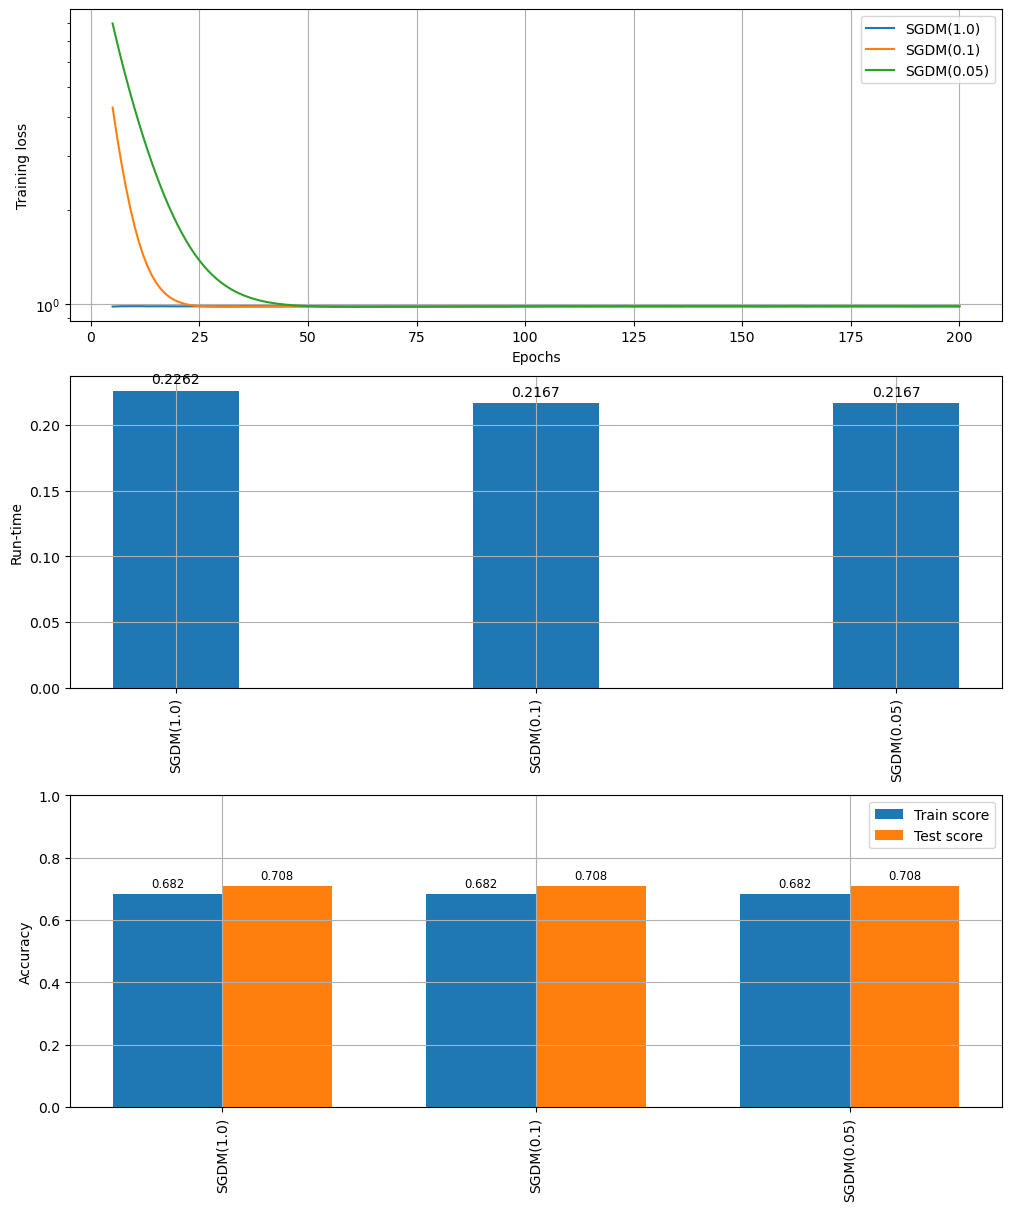

In [24]:
test_plots(modelsLoan_data3)

### MSL-SGDM-C/R

In [25]:
mslcLoan1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1, momentum=0.9)
mslcLoan2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1, momentum=0.9)
mslcLoan3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.01, momentum=0.9)

mslrLoan1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1, momentum=0.9)
mslrLoan2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1, momentum=0.9)
mslrLoan3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.01, momentum=0.9)

modelsLoan_data4 = optim_data([mslcLoan1, mslcLoan2, mslcLoan3, mslrLoan1, mslrLoan2, mslrLoan3])

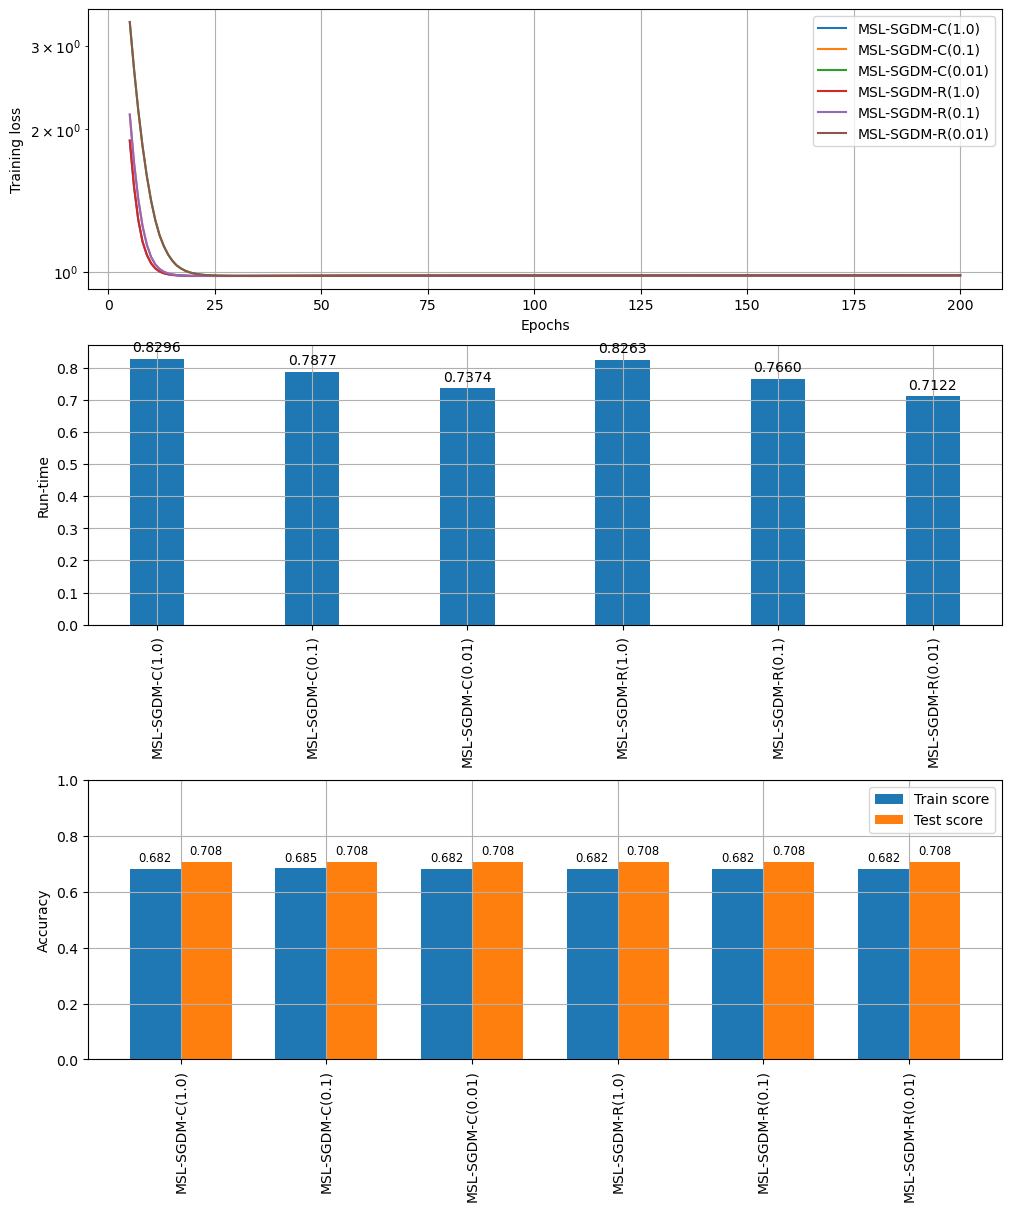

In [26]:
test_plots(modelsLoan_data4)

## Summary

In [27]:
pd.concat([modelsLoan_data1, modelsLoan_data2, modelsLoan_data3, modelsLoan_data4]).drop(columns={"Solution", "Loss/Epochs", "labels"})

,Solver,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy
0,SGD-Fixed,16,1.00,0.0,0.986794,0.325904,0.203844,200,0.625000,0.687500
1,SGD-Fixed,16,0.10,0.0,0.984274,0.317291,0.186637,200,0.682292,0.708333
2,SGD-Fixed,16,0.05,0.0,0.984186,0.316995,0.204159,200,0.682292,0.708333
3,SGD-Decreasing,16,1.00,0.0,0.984125,0.316790,0.183476,200,0.682292,0.708333
4,SGD-Decreasing,16,0.10,0.0,0.984125,0.316791,0.184208,200,0.682292,0.708333
5,SGD-Decreasing,16,0.05,0.0,0.983771,0.315633,0.200348,200,0.684896,0.708333
0,SGD-Armijo,16,1.00,0.0,0.984005,0.316392,0.795221,200,0.682292,0.708333
1,SGD-Armijo,16,0.10,0.0,0.983981,0.316315,0.755242,200,0.682292,0.708333
2,SGD-Armijo,16,0.01,0.0,0.983947,0.316201,0.696185,200,0.682292,0.708333
0,SGDM,16,1.00,0.9,0.984179,0.317057,0.226201,200,0.682292,0.708333


# HR score dataset

In [2]:
# load with constant column
X_train_hr = pd.read_csv("datasets/hr_score/hr_X_train.csv").values
y_train_hr = pd.read_csv("datasets/hr_score/hr_y_train.csv").values.reshape(-1)
X_test_hr = pd.read_csv("datasets/hr_score/hr_X_test.csv").values
y_test_hr = pd.read_csv("datasets/hr_score/hr_y_test.csv").values.reshape(-1)

In [5]:
print(f"""
HR score dataset
X_train = {X_train_hr.shape}, y_train = {y_train_hr.shape}
X_test = {X_test_hr.shape}, y_test = {y_test_hr.shape}""")


HR score dataset
X_train = (240, 10), y_train = (240,)
X_test = (60, 10), y_test = (60,)


In [6]:
w0HR = (2 + 2) * np.random.default_rng(42).random(10) - 2

## SGD

### SGD-Fixed/Decreasing

In [7]:
sgdHR_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1)
sgdHR_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1)
sgdHR_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01)

sgdHR_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1)
sgdHR_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1)
sgdHR_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01)

modelsHR_data1 = optim_data([sgdHR_fixed1, sgdHR_fixed2, sgdHR_fixed3, sgdHR_decre1, sgdHR_decre2, sgdHR_decre3])

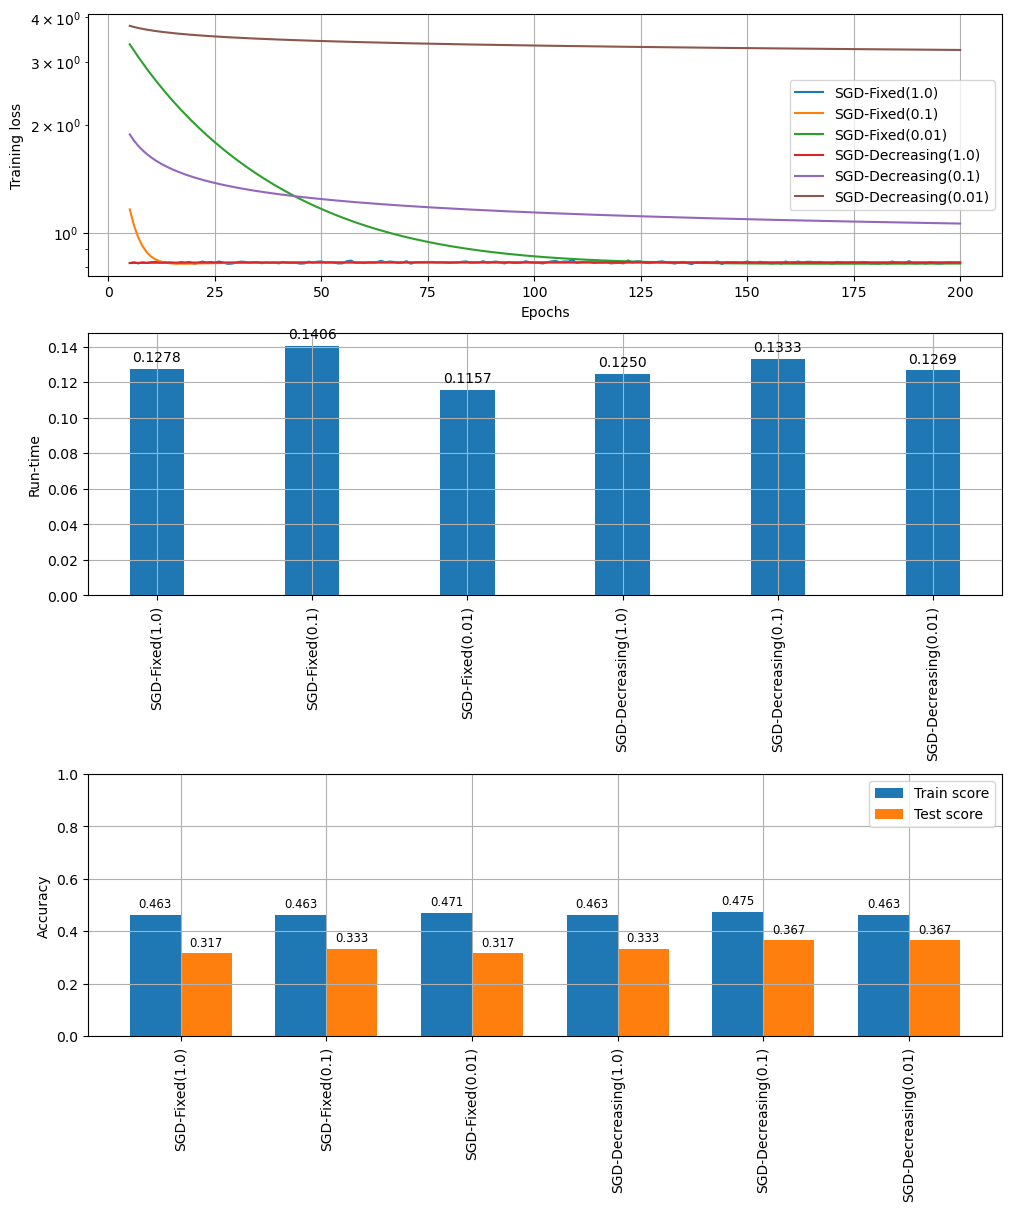

In [8]:
test_plots(modelsHR_data1)

### SGD-Armijo

In [10]:
sgdHR_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1)
sgdHR_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1)
sgdHR_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01)

modelsHR_data2 = optim_data([sgdHR_armijo1, sgdHR_armijo2, sgdHR_armijo3])

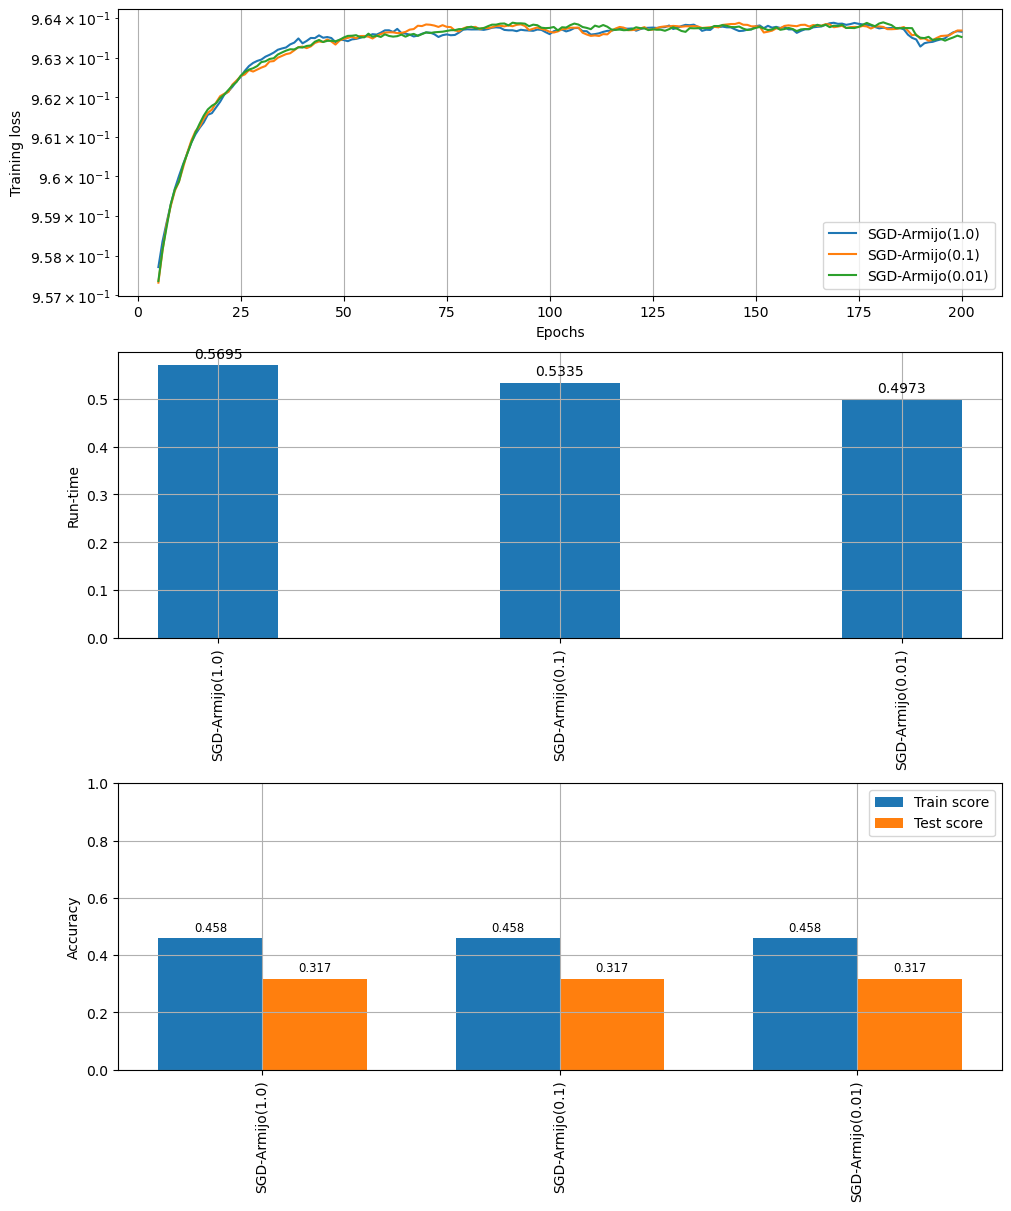

In [11]:
test_plots(modelsHR_data2)

## SGDM

In [12]:
sgdmHR1 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1, momentum=0.9)
sgdmHR2 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1, momentum=0.9)
sgdmHR3 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01, momentum=0.9)

modelsHR_data3 = optim_data([sgdmHR1, sgdmHR2, sgdmHR3])

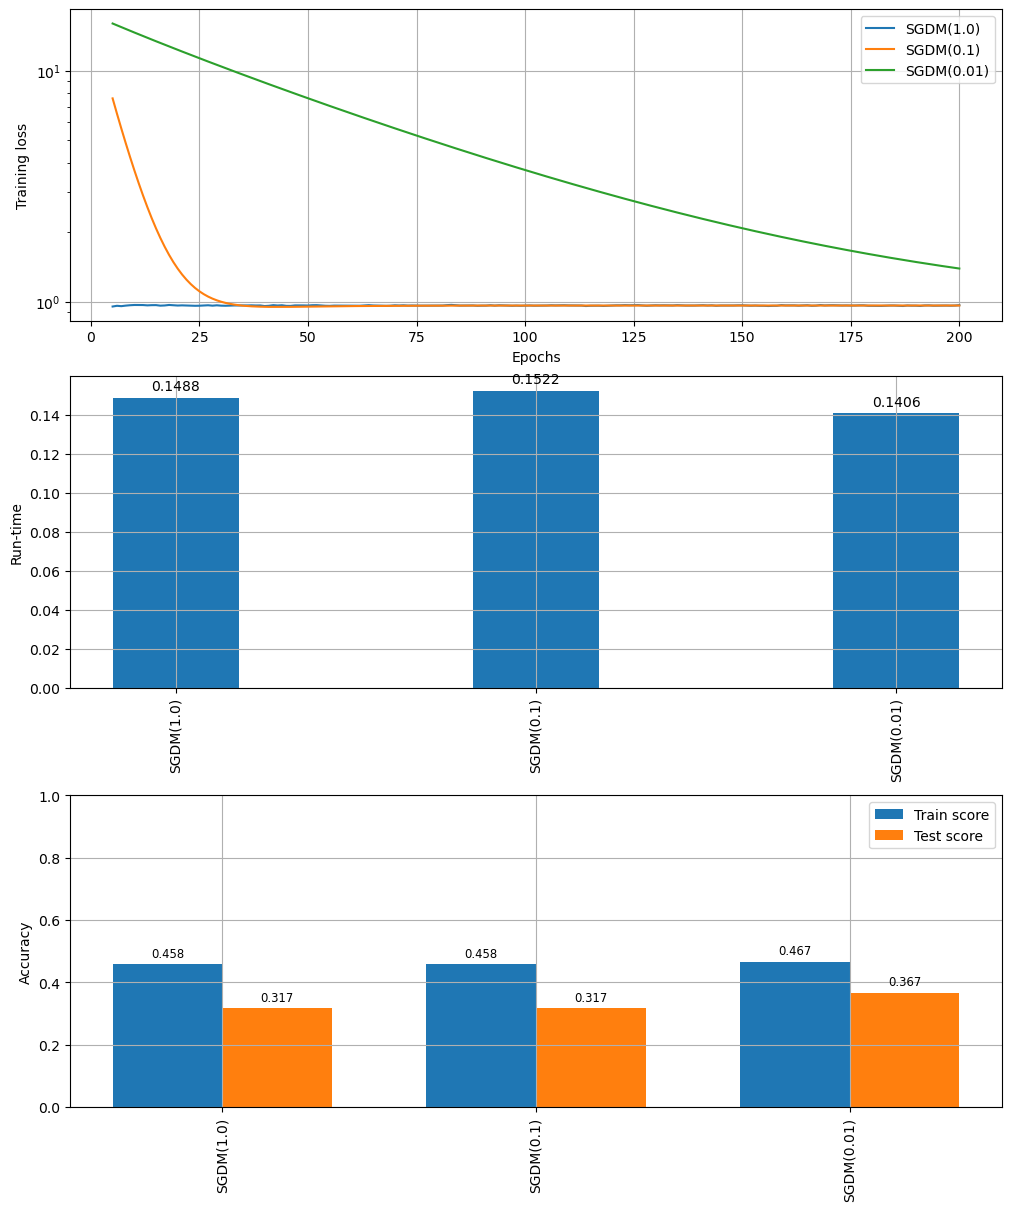

In [13]:
test_plots(modelsHR_data3)

### MSL-SGDM-C/R

In [14]:
mslcHR1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1, momentum=0.9)
mslcHR2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1, momentum=0.9)
mslcHR3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01, momentum=0.9)

mslrHR1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1, momentum=0.9)
mslrHR2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1, momentum=0.9)
mslrHR3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01, momentum=0.9)

modelsHR_data4 = optim_data([mslcHR1, mslcHR2, mslcHR3, mslrHR1, mslrHR2, mslrHR3])

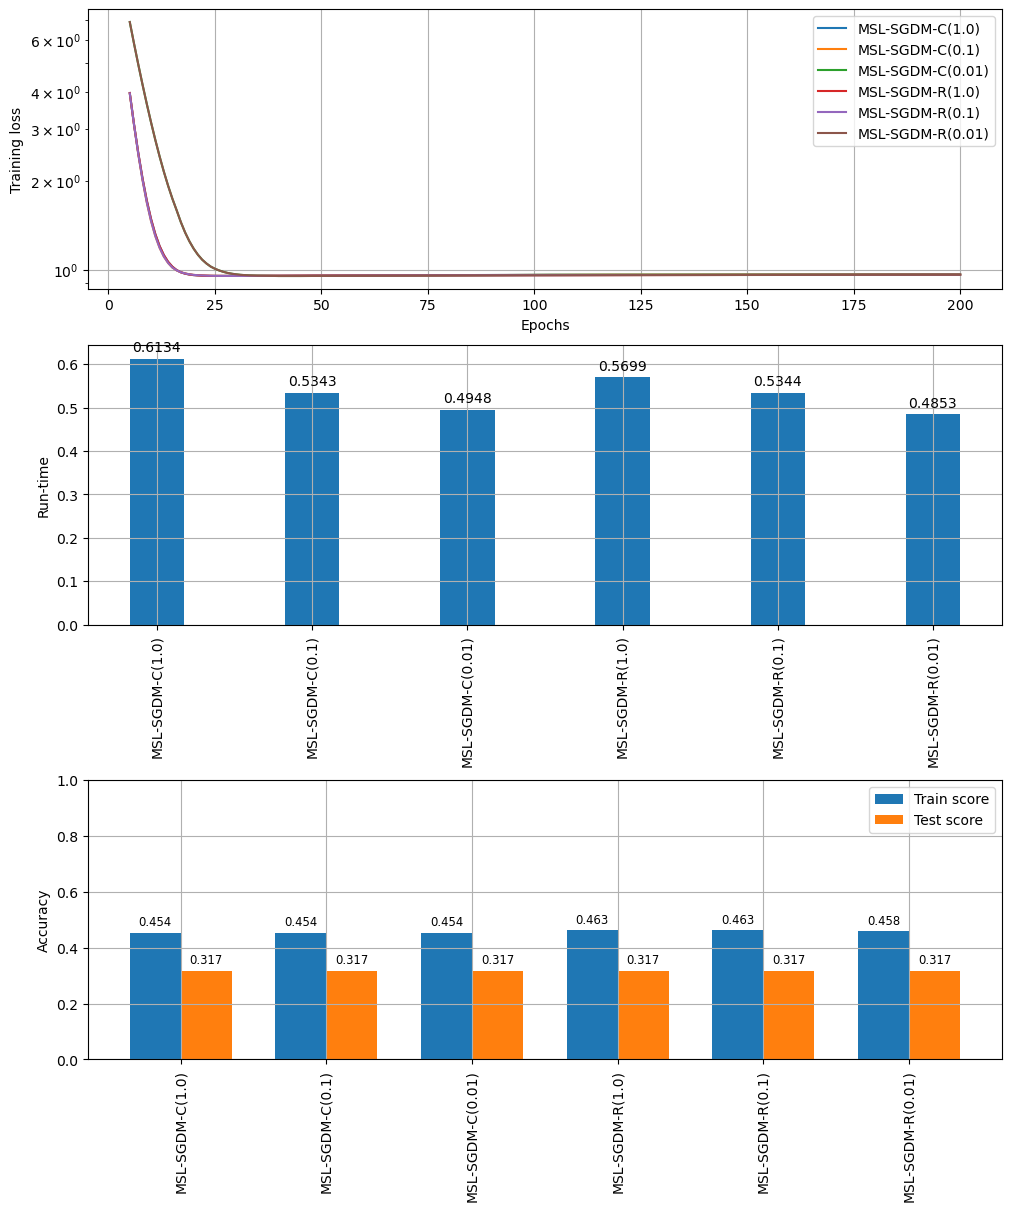

In [15]:
test_plots(modelsHR_data4)

## Summary

In [16]:
pd.concat([modelsHR_data1, modelsHR_data2, modelsHR_data3, modelsHR_data4]).drop(columns={"Solution", "Loss/Epochs", "labels"})

,Solver,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy
0,SGD-Fixed,16,1.00,0.0,0.825399,0.318026,0.127771,200,0.462500,0.316667
1,SGD-Fixed,16,0.10,0.0,0.825121,0.316516,0.140579,200,0.462500,0.333333
2,SGD-Fixed,16,0.01,0.0,0.819480,0.305799,0.115701,200,0.470833,0.316667
3,SGD-Decreasing,16,1.00,0.0,0.825272,0.316845,0.124959,200,0.462500,0.333333
4,SGD-Decreasing,16,0.10,0.0,1.060016,0.348094,0.133337,200,0.475000,0.366667
5,SGD-Decreasing,16,0.01,0.0,3.238566,0.735635,0.126931,200,0.462500,0.366667
0,SGD-Armijo,16,1.00,0.0,0.963653,0.466465,0.569457,200,0.458333,0.316667
1,SGD-Armijo,16,0.10,0.0,0.963683,0.466530,0.533494,200,0.458333,0.316667
2,SGD-Armijo,16,0.01,0.0,0.963519,0.466007,0.497300,200,0.458333,0.316667
0,SGDM,16,1.00,0.9,0.968139,0.481250,0.148799,200,0.458333,0.316667


# Bank churn dataset

In [2]:
# load with constant column
X_train_bank = pd.read_csv("datasets/bank_churn/bank_X_train.csv").values
y_train_bank = pd.read_csv("datasets/bank_churn/bank_y_train.csv").values.reshape(-1)
X_test_bank = pd.read_csv("datasets/bank_churn/bank_X_test.csv").values
y_test_bank = pd.read_csv("datasets/bank_churn/bank_y_test.csv").values.reshape(-1)

In [3]:
print(f"""
Bank churn dataset
X_train = {X_train_bank.shape}
X_test = {X_test_bank.shape}""")


Bank churn dataset
X_train = (139052, 18)
X_test = (34763, 18)


In [51]:
w0 = (1.5 + 1.5) * np.random.default_rng(42).random(18) - 1.5

## SGD

### SGD-Fixed

In [53]:
sgd_fixed2_1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=256).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.1)
sgd_fixed2_2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=256).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.01)
sgd_fixed2_3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=256).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.05)

models1_data2 = optim_data([sgd_fixed2_1, sgd_fixed2_2, sgd_fixed2_3])

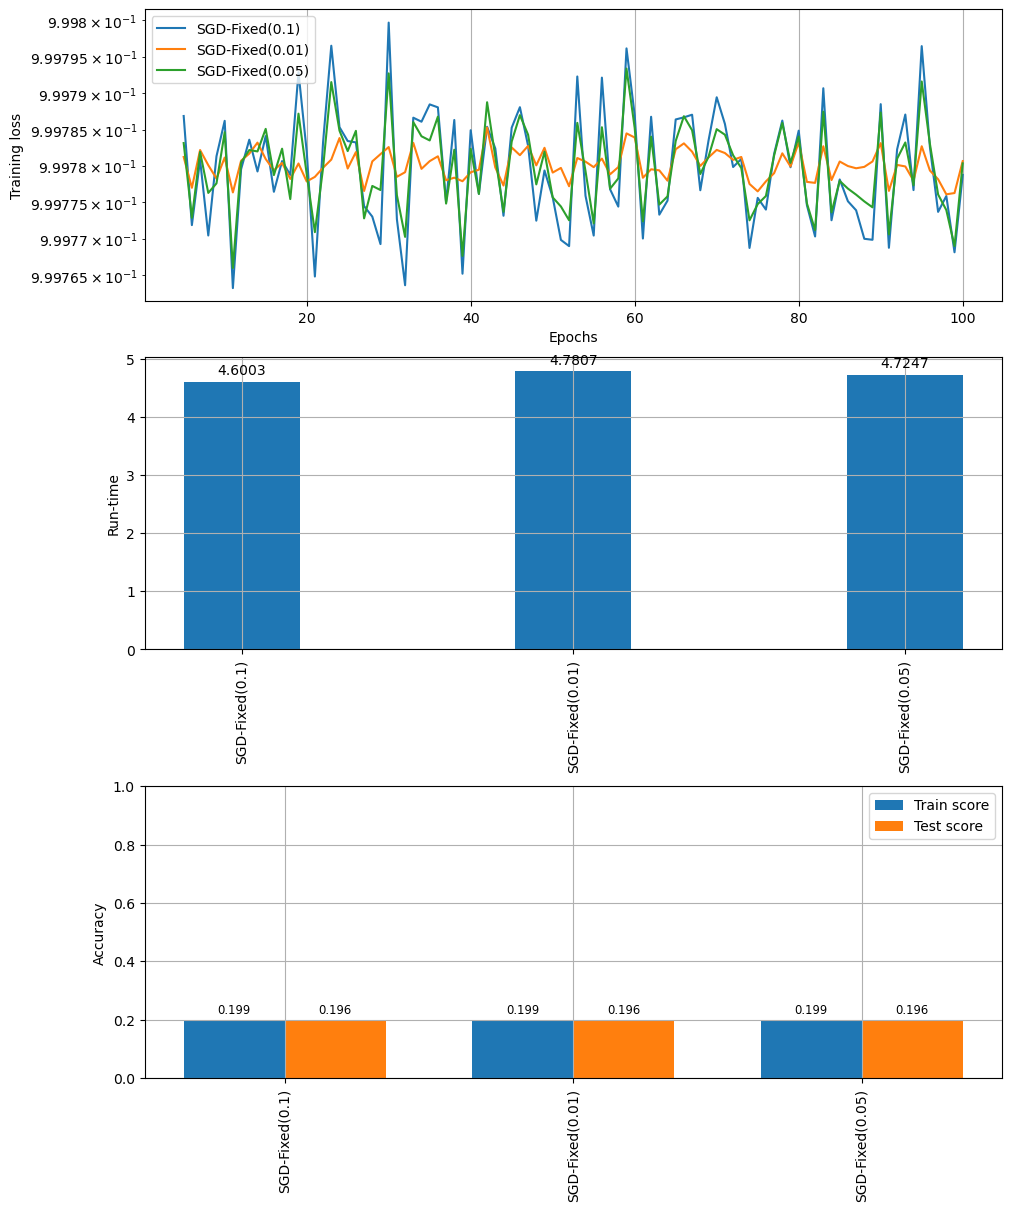

In [54]:
test_plots(models1_data2)

### SGD-Decreasing

In [55]:
sgd_decre2_1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=512).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.5)
sgd_decre2_2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=512).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.1)
sgd_decre2_3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=512).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.01)

models2_data2 = optim_data([sgd_decre2_1, sgd_decre2_2, sgd_decre2_3])

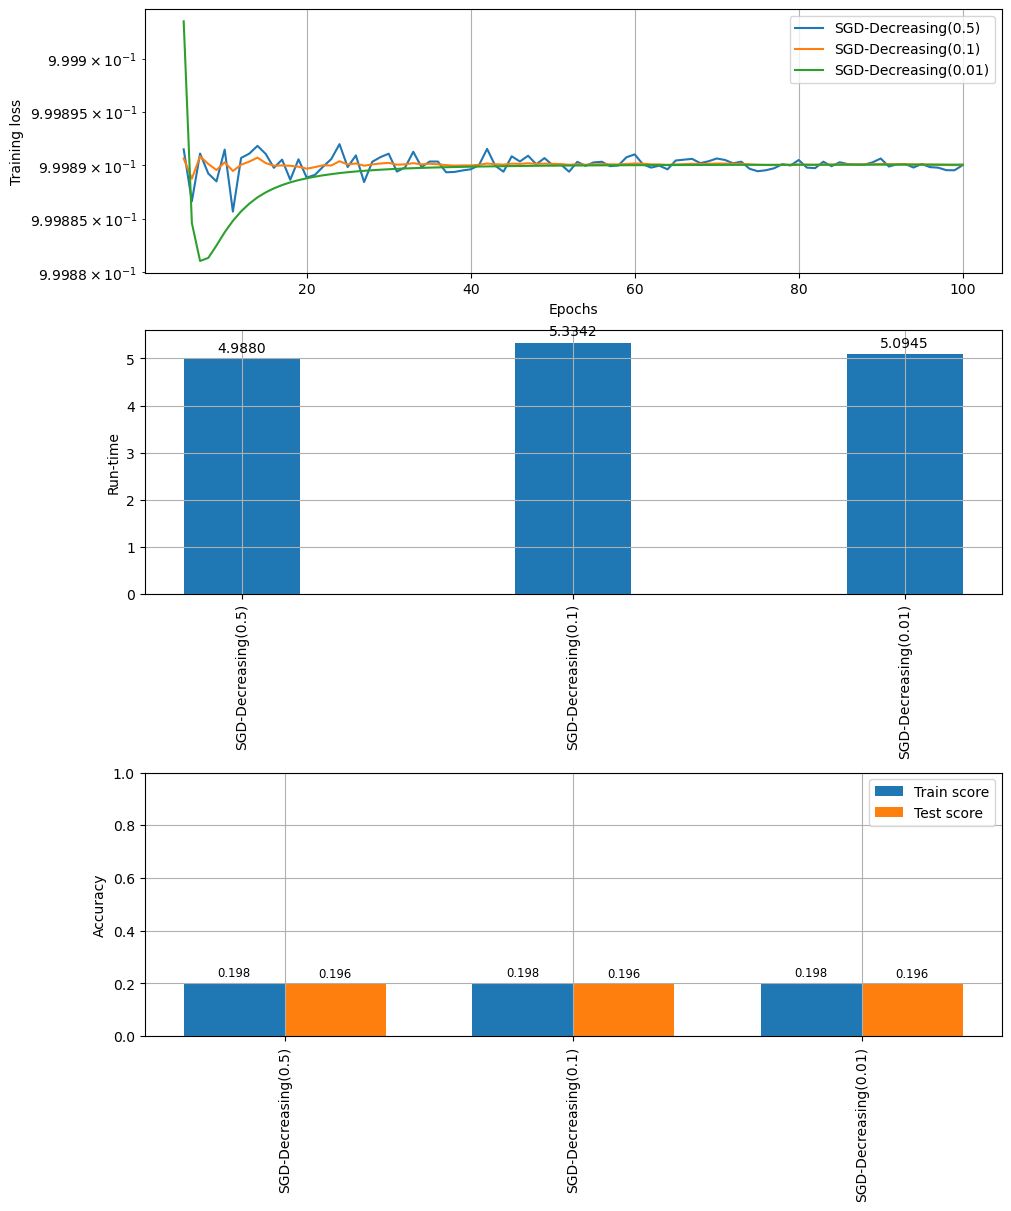

In [56]:
test_plots(models2_data2)

### SGD-Armijo

In [52]:
sgd_armijo2_1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.1)
#sgd_armijo2_2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=128).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.01)
#sgd_armijo2_3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=128).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.001)
# regolarizzazione massima, altrimenti ci impiega troppo per l'esecuzione

models3_data2 = optim_data([sgd_armijo2_1, sgd_armijo2_2, sgd_armijo2_3])

KeyboardInterrupt: 

## SGDM

### SGDM

# Breast cancer dataset

In [2]:
# load with constant column
X_train_breast = pd.read_csv("datasets/breast_cancer/breast_X_train.csv").values
y_train_breast = pd.read_csv("datasets/breast_cancer/breast_y_train.csv").values.reshape(-1)
X_test_breast = pd.read_csv("datasets/breast_cancer/breast_X_test.csv").values
y_test_breast = pd.read_csv("datasets/breast_cancer/breast_y_test.csv").values.reshape(-1)

In [3]:
print(f"""
Breast cancer dataset
X_train = {X_train_breast.shape}, y_train = {y_train_breast.shape}
X_test = {X_test_breast.shape}, y_test = {y_test_breast.shape}""")


Breast cancer dataset
X_train = (455, 31), y_train = (455,)
X_test = (114, 31), y_test = (114,)


In [4]:
w0Breast = (1.5 + 1.5) * np.random.default_rng(42).random(31) - 1.5

## SGD

### SGD-Fixed/Decreasing

In [18]:
sgdBreast_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1)
sgdBreast_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1)
sgdBreast_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.01)

sgdBreast_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1)
sgdBreast_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1)
sgdBreast_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.001)

modelsBreast_data1 = optim_data([sgdBreast_fixed1, sgdBreast_fixed2, sgdBreast_fixed3, sgdBreast_decre1, sgdBreast_decre2, sgdBreast_decre3])

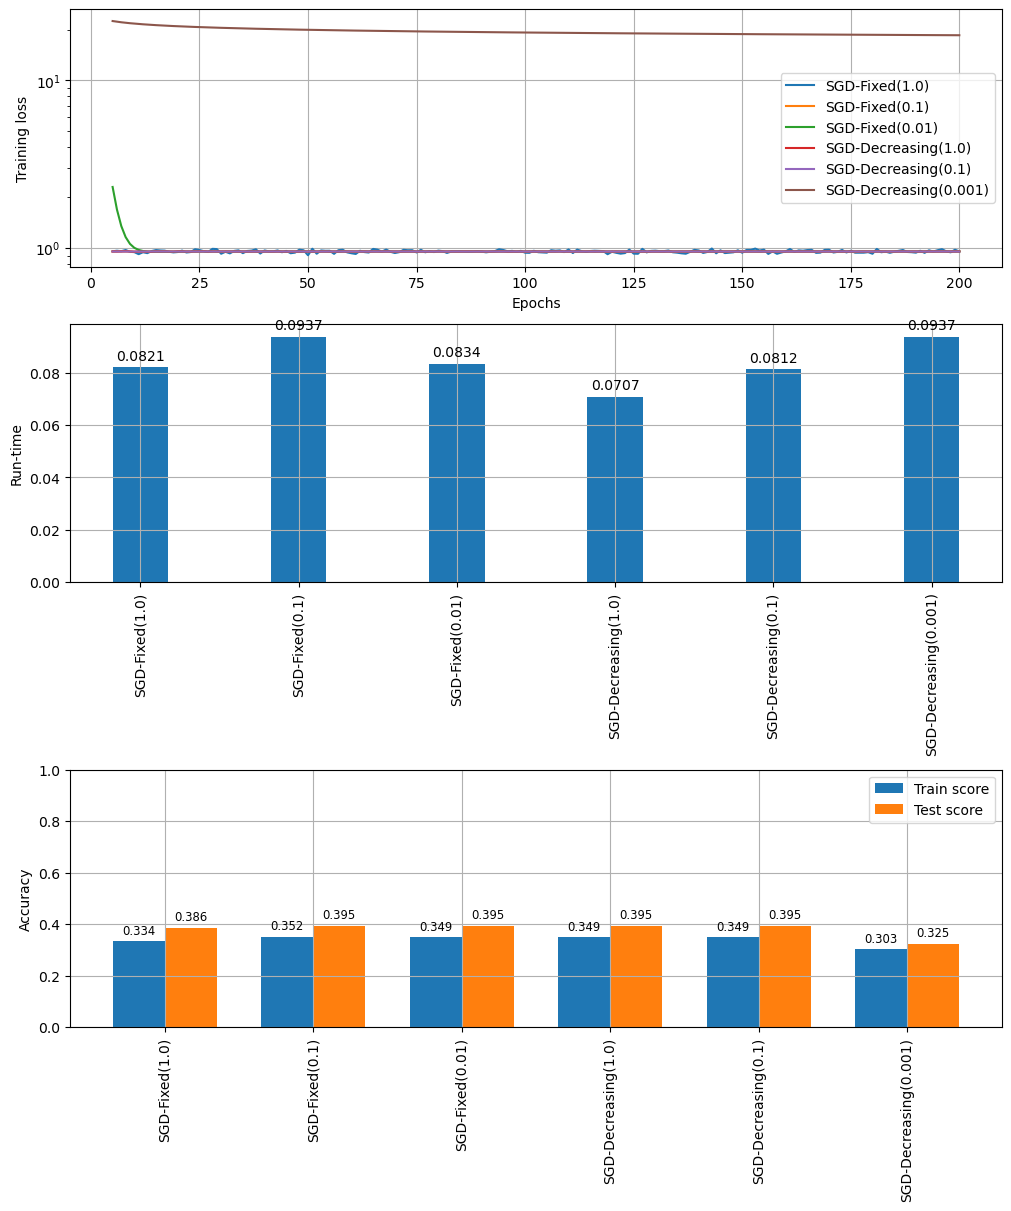

In [19]:
test_plots(modelsBreast_data1)

### SGD-Armijo

In [20]:
sgdBreast_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1)
sgdBreast_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1)
sgdBreast_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.01)

modelsBreast_data2 = optim_data([sgdBreast_armijo1, sgdBreast_armijo2, sgdBreast_armijo3])

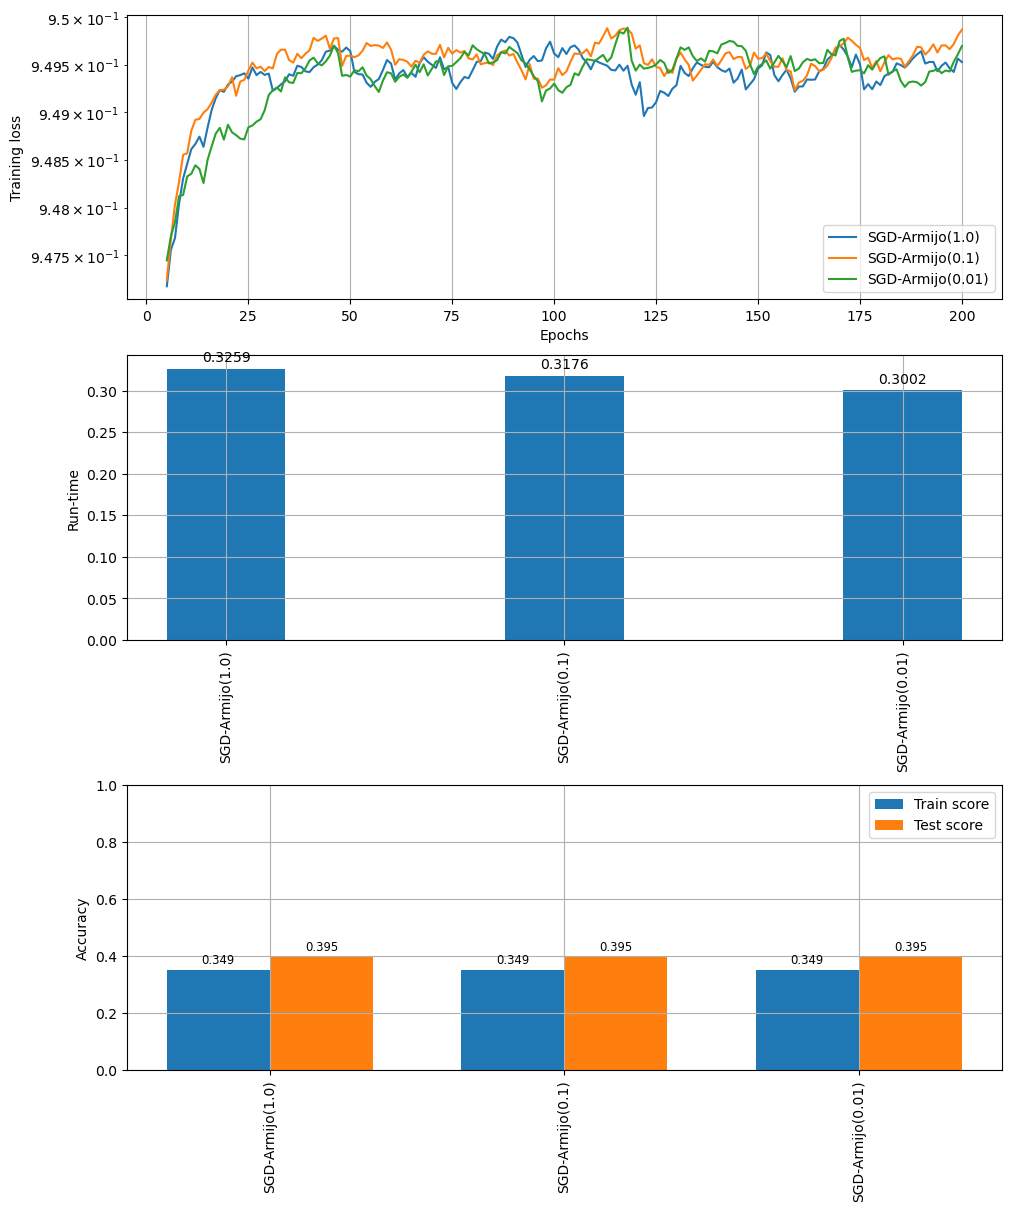

In [21]:
test_plots(modelsBreast_data2)

## SGDM

In [22]:
sgdmBreast_1 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1, momentum=0.9)
sgdmBreast_2 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1, momentum=0.9)
sgdmBreast_3 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.01, momentum=0.9)

modelsBreast_data3 = optim_data([sgdmBreast_1, sgdmBreast_2, sgdmBreast_3])

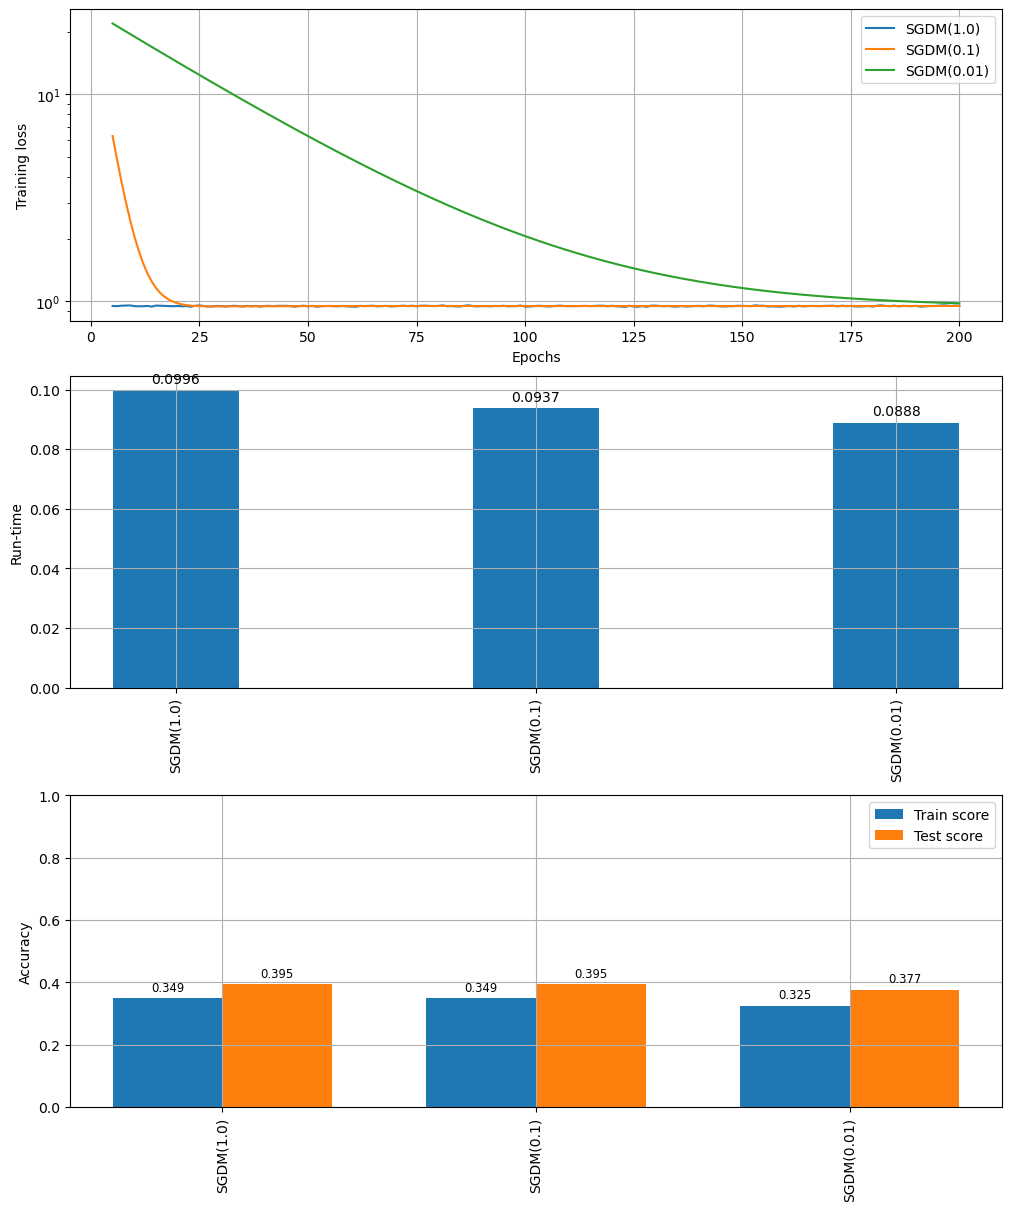

In [23]:
test_plots(modelsBreast_data3)

### MSL-SGDM-C/R

In [24]:
mslcBreast_1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1, momentum=0.9)
mslcBreast_2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1, momentum=0.9)
mslcBreast_3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.01, momentum=0.9)

mslrBreast_1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1, momentum=0.9)
mslrBreast_2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1, momentum=0.9)
mslrBreast_3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.01, momentum=0.9)

modelsBreast_data4 = optim_data([mslcBreast_1, mslcBreast_2, mslcBreast_3, mslrBreast_1, mslrBreast_2, mslrBreast_3])

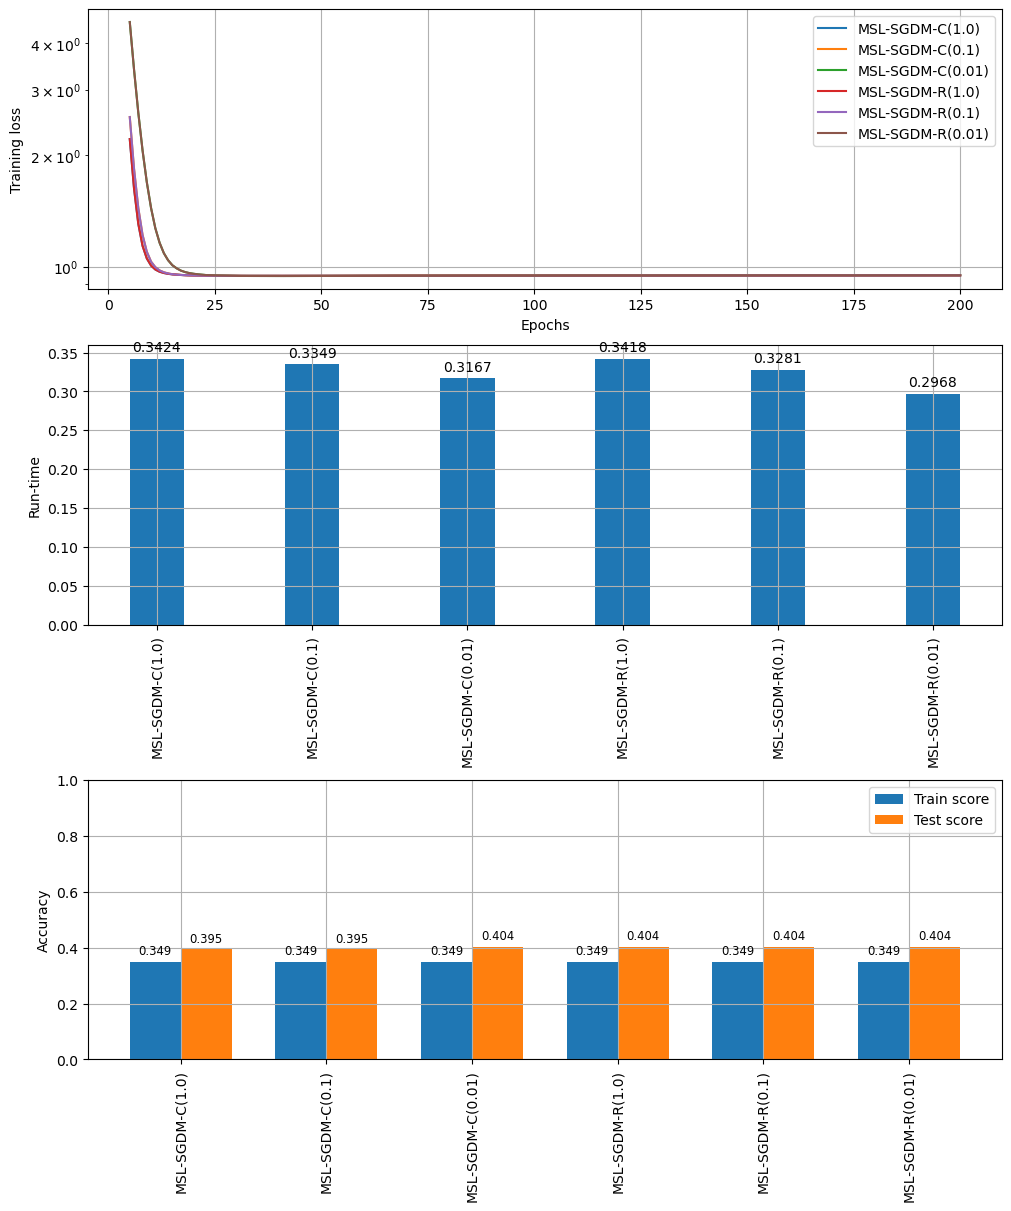

In [25]:
test_plots(modelsBreast_data4)

## Summary

In [26]:
pd.concat([modelsBreast_data1, modelsBreast_data2, modelsBreast_data3, modelsBreast_data4]).drop(columns={"Solution", "Loss/Epochs", "labels"})

,Solver,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy
0,SGD-Fixed,16,1.000,0.0,0.951438,0.554852,0.082094,200,0.334066,0.385965
1,SGD-Fixed,16,0.100,0.0,0.955607,0.575409,0.093741,200,0.351648,0.394737
2,SGD-Fixed,16,0.010,0.0,0.951427,0.559806,0.083421,200,0.349451,0.394737
3,SGD-Decreasing,16,1.000,0.0,0.951245,0.559104,0.070742,200,0.349451,0.394737
4,SGD-Decreasing,16,0.100,0.0,0.951105,0.558556,0.081245,200,0.349451,0.394737
5,SGD-Decreasing,16,0.001,0.0,18.500518,8.377942,0.093742,200,0.303297,0.324561
0,SGD-Armijo,16,1.000,0.0,0.949528,0.552386,0.325901,200,0.349451,0.394737
1,SGD-Armijo,16,0.100,0.0,0.949869,0.553749,0.317580,200,0.349451,0.394737
2,SGD-Armijo,16,0.010,0.0,0.949696,0.553019,0.300154,200,0.349451,0.394737
0,SGDM,16,1.000,0.9,0.953459,0.566955,0.099554,200,0.349451,0.394737
